In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://drive.google.com/file/d/1361vqjrbwdQaFDIl_Tp0b5crGX0ZCl2t/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)
dataset = pd.DataFrame(dataset)

# **Exploratory Data Analysis**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


1. No null value present.
2. We can see that age and children are integers whereas bmi and charges are float.
3. We also infer that sex, smoker and region are objects.

In [ ]:
print(dataset.sex.unique())
print(dataset.smoker.unique())
print(dataset.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


1. Sex has two unique values, namely '`male`' and '`female`'.
2. Smoker has two unique values, namely '`yes`' and '`no`'.
3. Region has four unique values, namely '`southwest`', '`southeast`', '`northwest`' and '`northeast`'.

In [ ]:
numerical = ['age', 'children', 'bmi', 'charges']
categorical = {'sex':['male','female'], 'smoker':['no','yes'], 'region':['southeast','southwest','northwest','northeast']}

### Piechart for categorical data

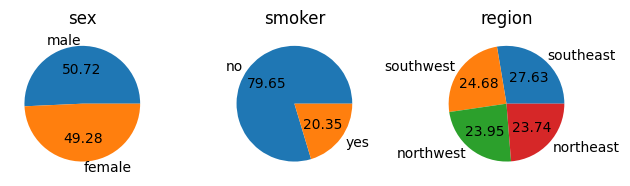

In [ ]:
i = 1
for cat in categorical:
  plt.subplot(1, 3, i)
  plt.pie(dataset[cat].value_counts(),labels=categorical[cat],autopct="%0.2f")
  plt.title(cat)
  i += 1
plt.tight_layout()
plt.show()

### Count, Mean, Standard Deviation, minimum, maximum and quartiles for the numerical data

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of charges for categorical data

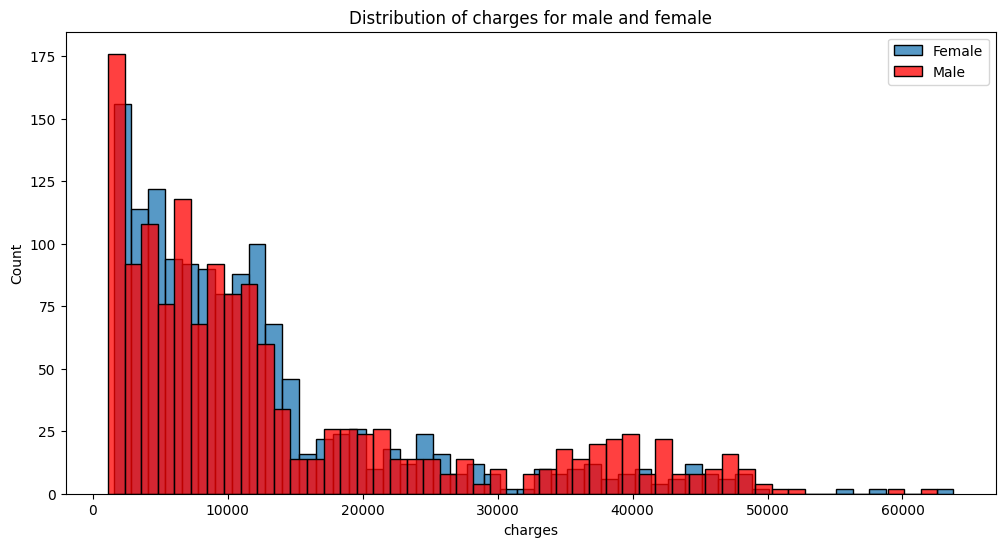

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of charges for male and female')
sns.histplot(dataset[dataset['sex'] == 'female']['charges'],bins=50, label = 'Female')
sns.histplot(dataset[dataset['sex'] == 'male']['charges'],bins = 50, color = 'red', label = 'Male')
plt.legend()
plt.show()

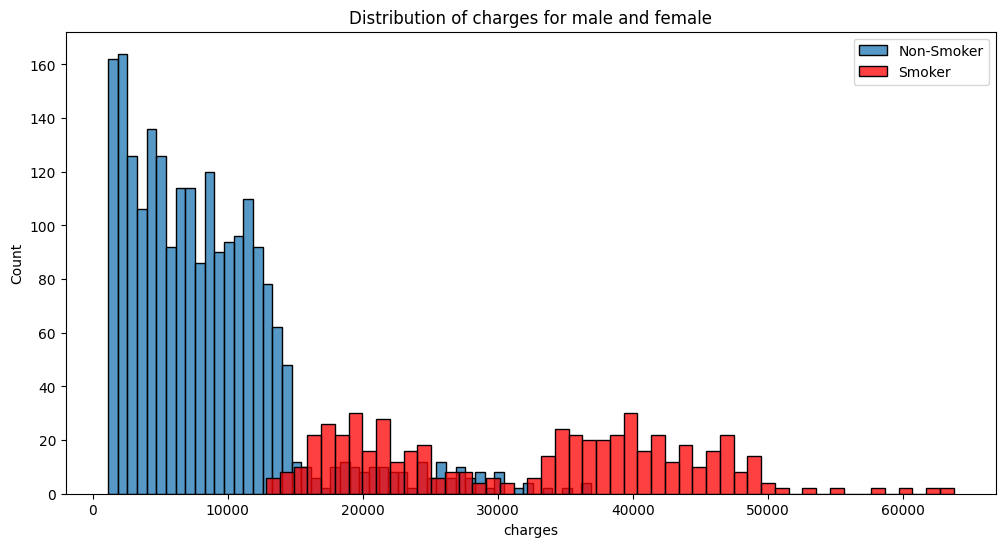

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of charges for male and female')
sns.histplot(dataset[dataset['smoker'] == 'no']['charges'],bins=50, label = 'Non-Smoker')
sns.histplot(dataset[dataset['smoker'] == 'yes']['charges'],bins = 50, color = 'red', label = 'Smoker')
plt.legend()
plt.show()

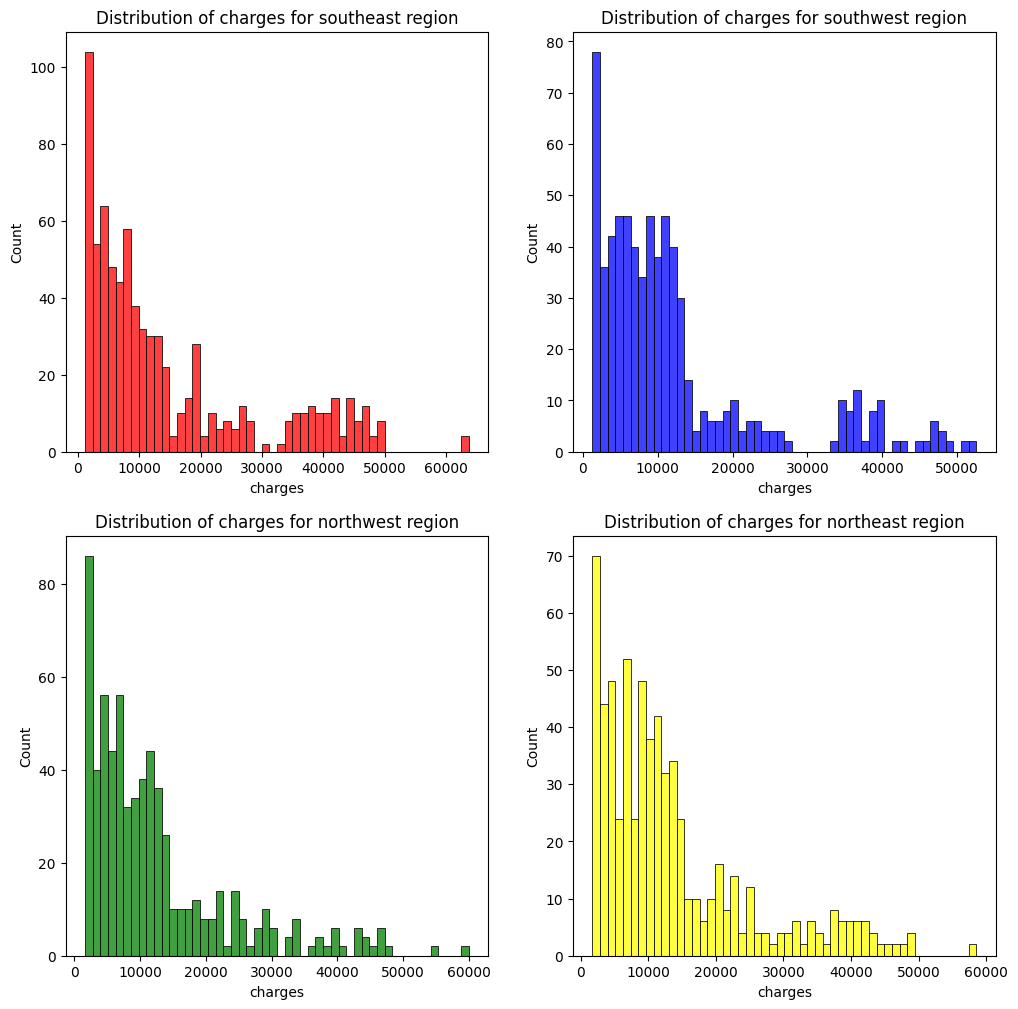

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))
color = ['red', 'blue', 'green', 'yellow']
i = 1
for val in categorical['region']:
  plt.subplot(2, 2, i)
  sns.histplot(dataset[dataset['region'] == val]['charges'], bins=50, color=color[i-1]).set(title='Distribution of charges for '+ val + ' region')
  i+=1
plt.show()

### Scatter plot for every pair of numerical data

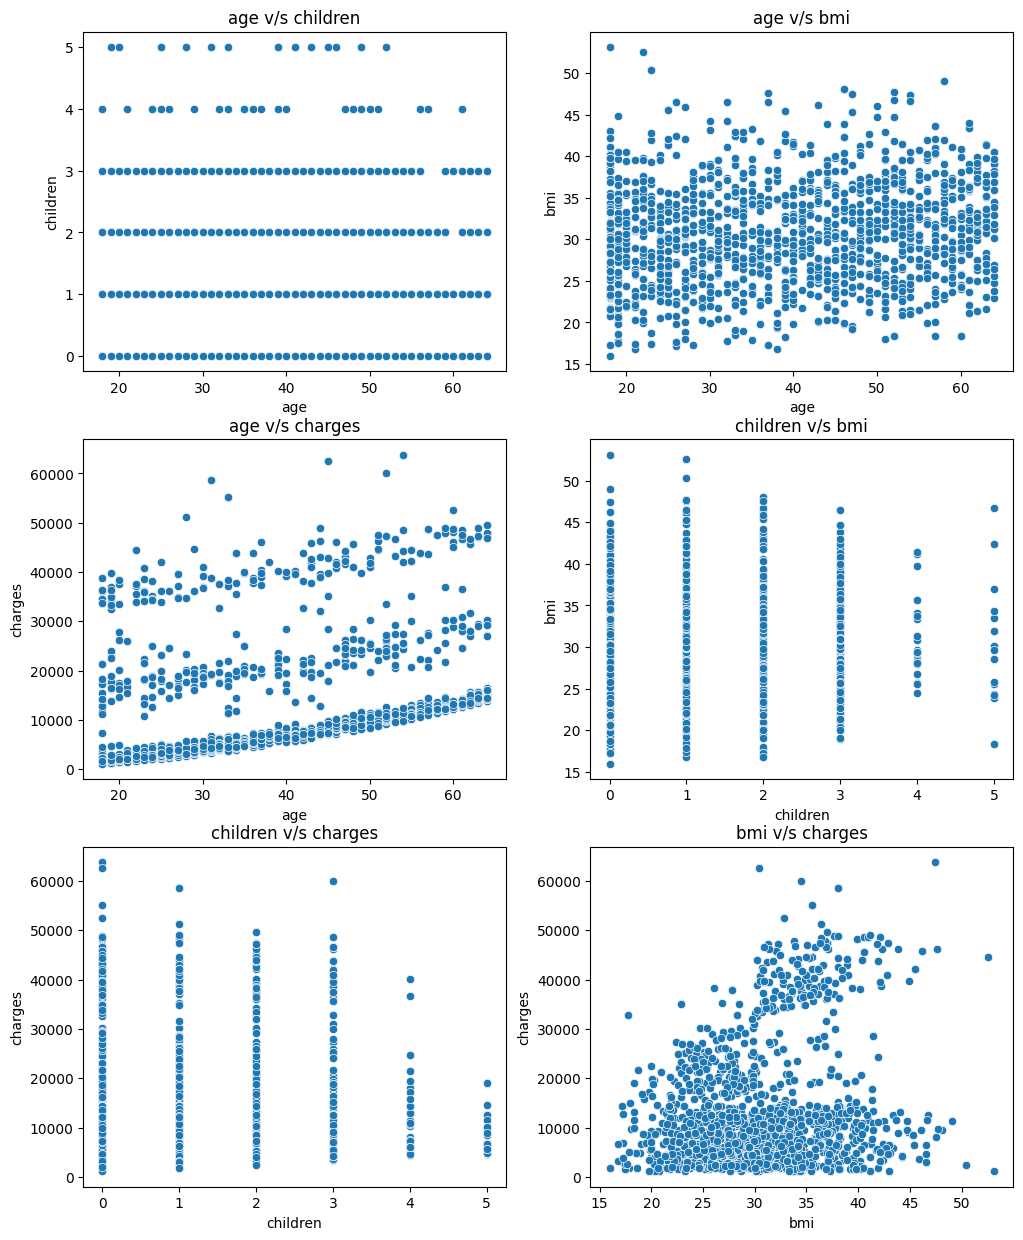

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))
l = len(numerical)
k = 1
for i in range(l):
  for j in range(i+1,l):
    plt.subplot(3, 2, k)
    sns.scatterplot(x=numerical[i],y=numerical[j] ,data=dataset).set(title=numerical[i]+' v/s '+numerical[j])
    k+=1
plt.show()

### Bar plot for the categorical data v/s charges

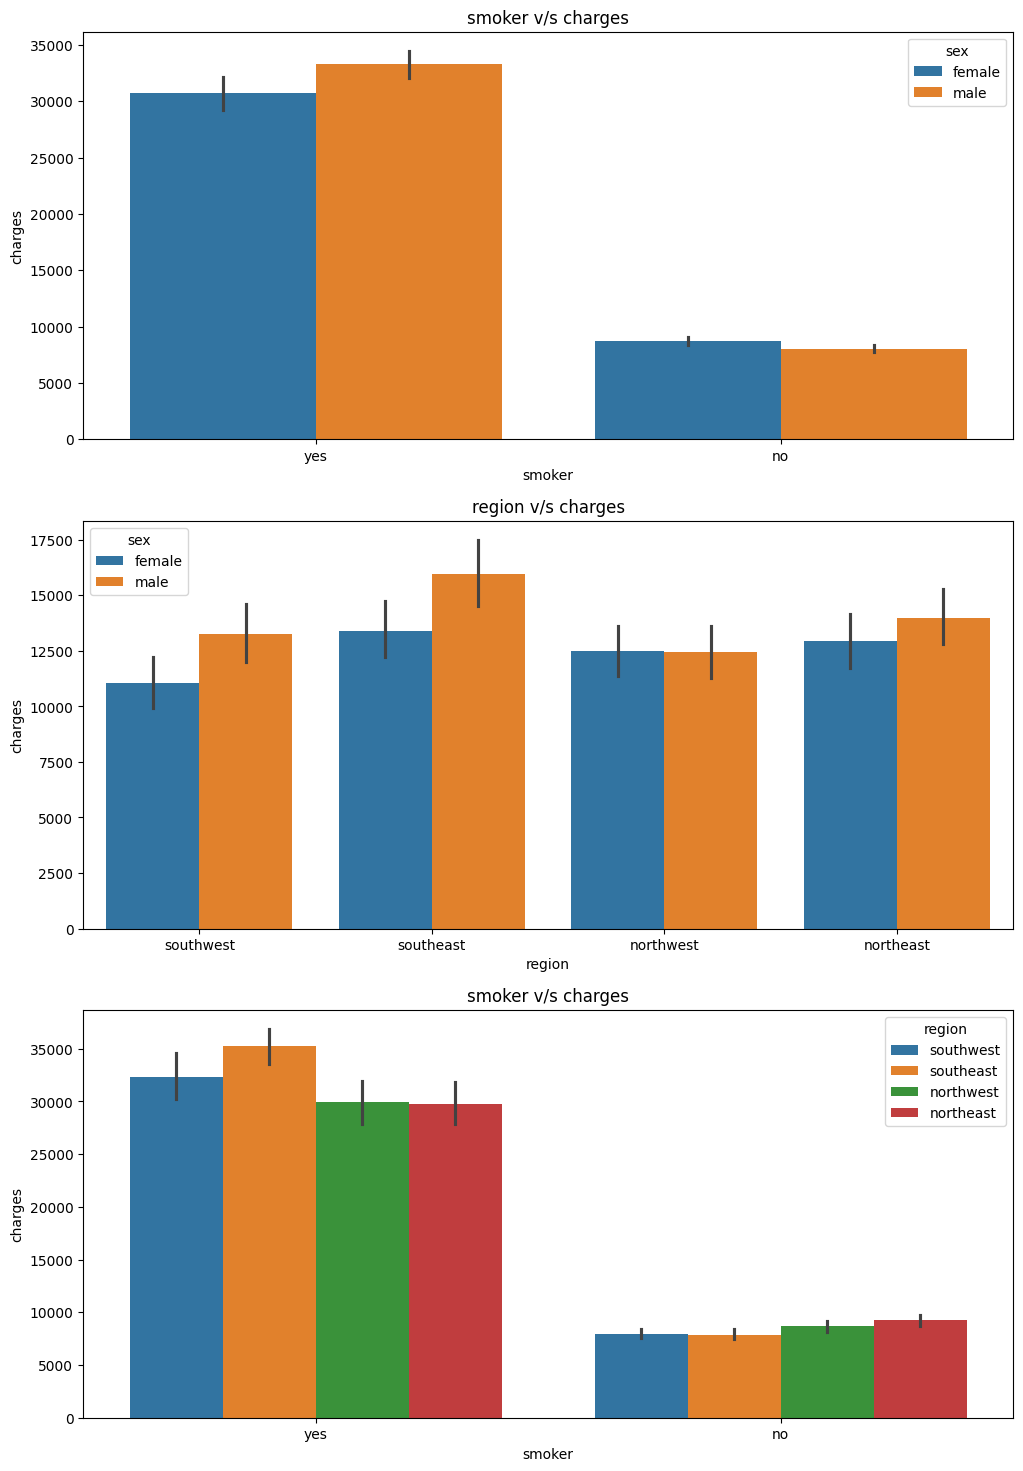

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
plt.subplot(3, 1, 1)
sns.barplot(x='smoker', y='charges', data=dataset, hue='sex').set(title='smoker v/s charges')
plt.subplot(3, 1, 2)
sns.barplot(x='region', y='charges', data=dataset, hue='sex').set(title='region v/s charges')
plt.subplot(3, 1, 3)
sns.barplot(x='smoker', y='charges', data=dataset, hue='region').set(title='smoker v/s charges')
plt.show()

### Box plots for numerical data

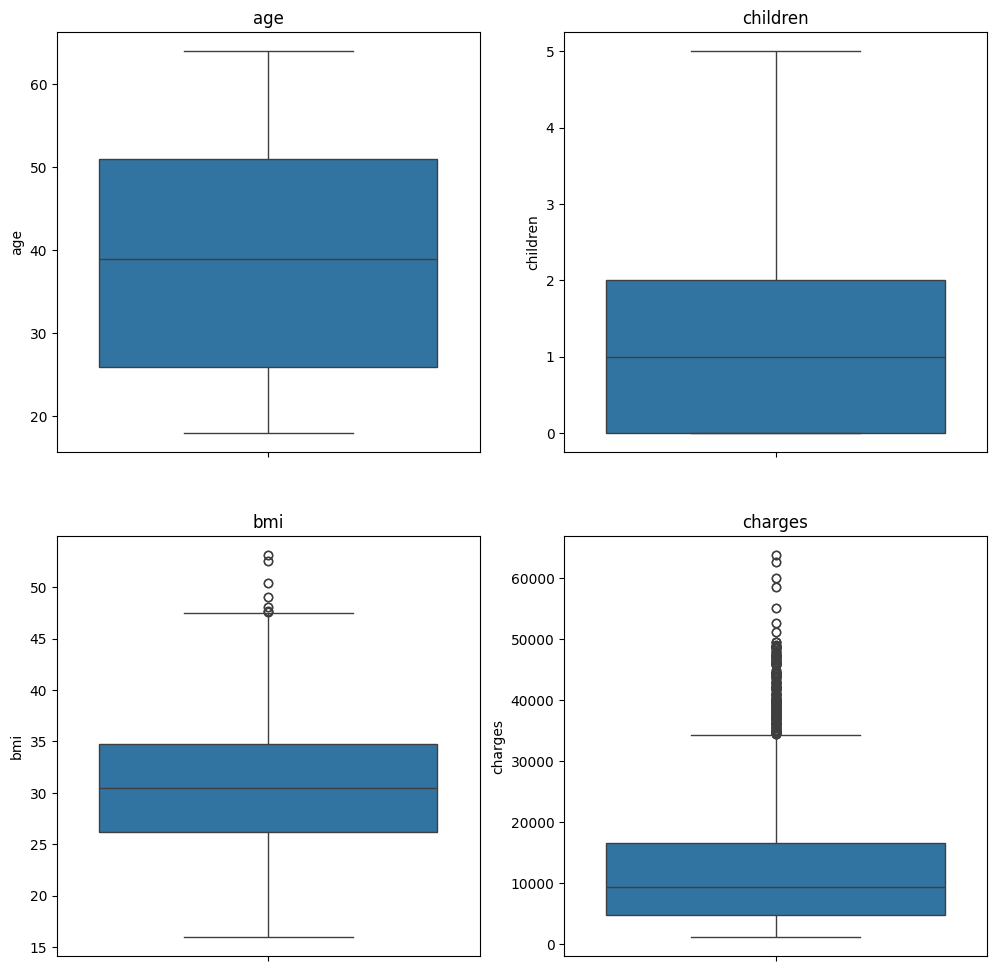

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))
i = 1
for num in numerical:
  plt.subplot(2, 2, i)
  sns.boxplot(dataset[num]).set(title=num)
  i+=1
plt.show()

### Correlation coefficient for numerical data

In [ ]:
#pd.DataFrame(dataset, columns=numerical).corr()
print('Pearson correlation')
print(dataset.loc[:, numerical].corr())

Pearson correlation
               age  children       bmi   charges
age       1.000000  0.037574  0.113048  0.298624
children  0.037574  1.000000 -0.001492  0.066442
bmi       0.113048 -0.001492  1.000000  0.199846
charges   0.298624  0.066442  0.199846  1.000000


In [ ]:
print('Spearman correlation')
print(dataset.loc[:, numerical].corr(method="spearman"))

Spearman correlation
               age  children       bmi   charges
age       1.000000  0.052196  0.112580  0.535880
children  0.052196  1.000000  0.003633  0.131624
bmi       0.112580  0.003633  1.000000  0.121857
charges   0.535880  0.131624  0.121857  1.000000


In [ ]:
print('Kendall tau')
print(dataset.loc[:, numerical].corr(method="kendall"))

Kendall tau
               age  children       bmi   charges
age       1.000000  0.039388  0.076719  0.476207
children  0.039388  1.000000  0.002574  0.101600
bmi       0.076719  0.002574  1.000000  0.084380
charges   0.476207  0.101600  0.084380  1.000000


### Skewness and Kurtosis for numerical data

In [ ]:
for num in numerical:
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(num,dataset[num].skew(),dataset[num].kurt()))

age : Skewness 0.062 and  Kurtosis -1.253
children : Skewness 0.955 and  Kurtosis 0.259
bmi : Skewness 0.280 and  Kurtosis -0.090
charges : Skewness 1.511 and  Kurtosis 1.566


# **Regression Analysis**

In [ ]:
cols = dataset.select_dtypes(include= "object").columns.to_list()
nums = dataset.loc[:, dataset.columns != 'charges'].select_dtypes(include= ["float", "int"]).columns.to_list()
binary = np.array([])
cat = np.array([])
for col in cols:
  if dataset[col].nunique() == 2:
    binary = np.append(binary, col)
  else:
    cat = np.append(cat, col)

print(binary)
print(cat)
print(nums)

['sex' 'smoker']
['region']
['age', 'bmi', 'children']


### Encoding categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
sex_encoder = LabelEncoder()
dataset['sex'] = sex_encoder.fit_transform(dataset['sex'])

smoker_encoder = LabelEncoder()
dataset['smoker'] = smoker_encoder.fit_transform(dataset['smoker'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(dataset[cat])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat))

# Concatenate the one-hot encoded dataframe with the original dataframe
dataset = pd.concat([dataset, one_hot_df], axis=1)

# Drop the original categorical columns
dataset = dataset.drop(cat, axis=1)

### Separating the independent and dependent variables and test-train split

In [ ]:
X = dataset.loc[:, dataset.columns != 'charges'].values
y = dataset.loc[:, dataset.columns == 'charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.model_selection import cross_val_score

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

scores_lr = cross_val_score(lin_reg, X, y, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_lr.mean(), scores_lr.std()))

lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print('Train Score: ', lin_reg.score(X_train, y_train))
print('Test Score: ', lin_reg.score(X_test, y_test))


10-fold Cross Validation Summary:  0.748 accuracy with a standard deviation of 0.029
Train Score:  0.746732693004169
Test Score:  0.7650037798799999


### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Beyond degree=4, r2_score starts dropping
hptune_score_pr = {}
for d in range(2,11):
  poly_reg = PolynomialFeatures(degree=d, include_bias=False)
  X_poly = poly_reg.fit_transform(dataset[nums])
  poly_features = pd.DataFrame(X_poly, columns = poly_reg.get_feature_names_out(nums))
  dataset_poly = dataset.drop(nums, axis=1)
  dataset_poly = pd.concat([dataset_poly, poly_features], axis=1)

  X_pr = dataset_poly.loc[:, dataset_poly.columns != 'charges'].values
  y_pr = dataset_poly.loc[:, dataset_poly.columns == 'charges'].values
  X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X_pr, y_pr, test_size = 0.2, random_state = 5)

  pol_reg = LinearRegression()
  pol_reg.fit(X_train_pr, y_train_pr)
  y_pred_pr = pol_reg.predict(X_test_pr)
  hptune_score_pr.update({d: pol_reg.score(X_test_pr, y_test_pr)})

In [ ]:
print(max(hptune_score_pr, key= (lambda x: hptune_score_pr[x])))

4


In [ ]:
poly_reg = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_reg.fit_transform(dataset[nums])
poly_features = pd.DataFrame(X_poly, columns = poly_reg.get_feature_names_out(nums))
dataset_poly = dataset.drop(nums, axis=1)
dataset_poly = pd.concat([dataset_poly, poly_features], axis=1)

X_pr = dataset_poly.loc[:, dataset_poly.columns != 'charges'].values
y_pr = dataset_poly.loc[:, dataset_poly.columns == 'charges'].values
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X_pr, y_pr, test_size = 0.2, random_state = 5)

pol_reg = LinearRegression()

scores_pr = cross_val_score(pol_reg, X_pr, y_pr, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_pr.mean(), scores_pr.std()))

pol_reg.fit(X_train_pr, y_train_pr)
y_pred_pr = pol_reg.predict(X_test_pr)
print('Train Score: ', pol_reg.score(X_train_pr, y_train_pr))
print('Test Score: ', pol_reg.score(X_test_pr, y_test_pr))

10-fold Cross Validation Summary:  0.754 accuracy with a standard deviation of 0.027
Train Score:  0.7597791238699328
Test Score:  0.7676041278687928


### Support Vector Regression

In [ ]:
X_svr = dataset.loc[:, dataset.columns != 'charges']
y_svr = dataset.loc[:, dataset.columns == 'charges']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), nums)], remainder='passthrough')
X_svr = np.array(ct.fit_transform(X_svr))
sc_y = StandardScaler()
y_svr = np.array(sc_y.fit_transform(y_svr))

X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='rbf')
scores_svr = cross_val_score(reg_svr, X_svr, y_svr, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_svr.mean(), scores_svr.std()))
reg_svr.fit(X_svr, y_svr)
y_pred_svr = reg_svr.predict(X_test_svr)
print('Train Score: ', reg_svr.score(X_train_svr, y_train_svr))
print('Test Score: ', reg_svr.score(X_test_svr, y_test_svr))

10-fold Cross Validation Summary:  0.852 accuracy with a standard deviation of 0.036
Train Score:  0.8599826087856401
Test Score:  0.8710212458550373


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=5)

scores_dtr = cross_val_score(dt_reg, X, y, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_dtr.mean(), scores_dtr.std()))

dt_reg.fit(X_train, y_train)
y_pred_dtr = dt_reg.predict(X_test)
print('Train Score: ', dt_reg.score(X_train, y_train))
print('Test Score: ', dt_reg.score(X_test, y_test))

10-fold Cross Validation Summary:  0.998 accuracy with a standard deviation of 0.003
Train Score:  0.9987563020562882
Test Score:  0.9237952859973847


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=5)

scores_rfr = cross_val_score(rf_reg, X, y, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_rfr.mean(), scores_rfr.std()))

rf_reg.fit(X_train, y_train)
y_pred_rfr = rf_reg.predict(X_test)
print('Train Score: ', rf_reg.score(X_train, y_train))
print('Test Score: ', rf_reg.score(X_test, y_test))

10-fold Cross Validation Summary:  0.970 accuracy with a standard deviation of 0.009
Train Score:  0.9876073134458949
Test Score:  0.945132788357803


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
estimators = [3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500]
hptune_score_gbr = {}
for d in estimators:
  gb_reg = GradientBoostingRegressor(n_estimators= d, random_state= 5)
  gb_reg.fit(X_train, y_train)
  y_pred_gbr = gb_reg.predict(X_test)
  hptune_score_gbr.update({d: gb_reg.score(X_test, y_test)})

In [ ]:
print(max(hptune_score_gbr, key= (lambda x: hptune_score_gbr[x])))

3700


In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators= 3700, random_state= 5)
scores_gbr = cross_val_score(gb_reg, X, y, cv=10)
print("10-fold Cross Validation Summary:  %0.3f accuracy with a standard deviation of %0.3f" % (scores_gbr.mean(), scores_gbr.std()))
gb_reg.fit(X_train, y_train)
y_pred_gbr = gb_reg.predict(X_test)
print('Train Score: ', gb_reg.score(X_train, y_train))
print('Test Score: ', gb_reg.score(X_test, y_test))

10-fold Cross Validation Summary:  0.982 accuracy with a standard deviation of 0.007
Train Score:  0.9940349549113855
Test Score:  0.9428614156718457


### Among all the models, the Decision Tree Regressor gives the best 10 fold cross validation accuracy. So, we will select it for further deployment as a REST API.

In [ ]:
import joblib

joblib.dump(sex_encoder, "sex_encoder.pkl")
joblib.dump(smoker_encoder, "smoker_encoder.pkl")
joblib.dump(encoder, "ohe.pkl")
joblib.dump(dt_reg, "model.sav")

['model.sav']